In [ ]:
# Checking tensorflow version

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Mounting Drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing everything is needed.

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import nltk
nltk.download('stopwords')

import numpy as np
import tensorflow as tf
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(oov_token="<OOV>")
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Reading .CSV file
file_link = "/content/drive/MyDrive/PublicAIData/app_reviews.csv"
df = pd.read_csv(file_link, encoding='ISO-8859-1')

In [5]:
df.size

149940

In [ ]:
# Adding sentiment for learning properly

In [6]:
df['sentiments'] = df.score.apply(lambda x: 0 if x in [1, 2] else 1)

In [ ]:
# Splitting the data into training and testing

In [7]:
split = round(len(df)*0.8)
train_reviews = df['content'][:split]
train_label = df['sentiments'][:split]
test_reviews = df['content'][split:]
test_label = df['sentiments'][split:]

In [8]:
train_reviews.tail()

9991    Tasks that repeat more than once daily dont wo...
9992    Decent app but does NOT seem to be able to syn...
9993    I keep completing tasks, and the next day they...
9994    PLEASE make a home screen where it shows your ...
9995    trying to switch from wunderlist and the impor...
Name: content, dtype: object

In [ ]:
# In order to avoid any issues for casting to str, we'll create a object for doing this step.

In [9]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

Defining static values.

In [10]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [ ]:
# Tokenizer for the senteces

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
# Seq and padded

In [12]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [ ]:
#Model creation.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Compile model.

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Model Summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           640000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 24)                46104     
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 686417 (2.62 MB)
Trainable params: 686417 (2.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Training the model.

In [16]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [17]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))



Epoch 1/10
313/313 [==============================] - 38s 110ms/step - loss: 0.5971 - accuracy: 0.6656 - val_loss: 0.4588 - val_accuracy: 0.7803
Epoch 2/10
313/313 [==============================] - 11s 36ms/step - loss: 0.3837 - accuracy: 0.8337 - val_loss: 0.4339 - val_accuracy: 0.8031
Epoch 3/10
313/313 [==============================] - 5s 17ms/step - loss: 0.2538 - accuracy: 0.9045 - val_loss: 0.4872 - val_accuracy: 0.7915
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 0.1426 - accuracy: 0.9547 - val_loss: 0.5742 - val_accuracy: 0.7803
Epoch 5/10
313/313 [==============================] - 5s 16ms/step - loss: 0.0806 - accuracy: 0.9760 - val_loss: 0.7002 - val_accuracy: 0.7811
Epoch 6/10
313/313 [==============================] - 4s 14ms/step - loss: 0.0518 - accuracy: 0.9857 - val_loss: 0.8072 - val_accuracy: 0.7683
Epoch 7/10
313/313 [==============================] - 3s 10ms/step - loss: 0.0374 - accuracy: 0.9909 - val_loss: 0.9463 - val_accuracy: 0.7

In [ ]:
#Ploting the graph

<Figure size 640x480 with 0 Axes>

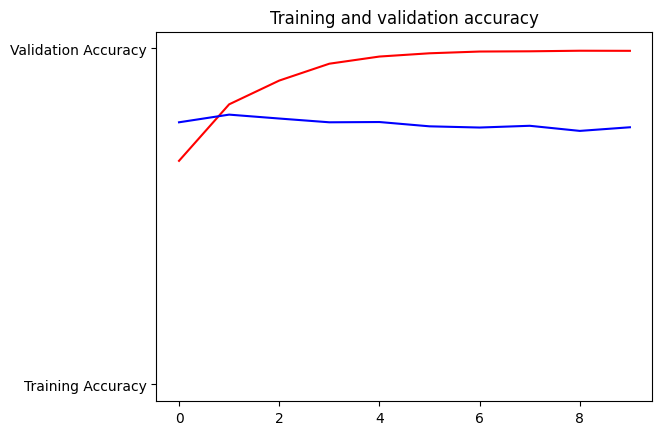

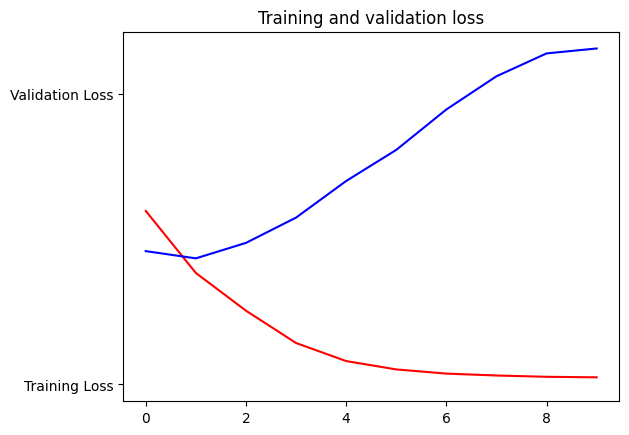

<Figure size 640x480 with 0 Axes>

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [ ]:
# result = model.predict

In [ ]:
# you can also use a google play or app store for fetching the app reviews and define which sentiment it contains.

In [20]:
new_sentences = [
    'Im so glad I find this app!',
    'This app is so boring',
    'This app is so hilarious. I had a really great time!',
    'Very linear scenario, no surprises at all.',
    'Another amazing feature addition to the app with good improvements.',
    'This app is a complete disaster'
    ]

new_sequences = tokenizer.texts_to_sequences(new_sentences)
padded=pad_sequences(new_sequences, maxlen=max_length,truncating=trunc_type)
output=model.predict(padded)

for i in range(0,len(new_sentences)):
    print('Review: '+new_sentences[i]+''+' - Sentiment: '+str(output[i])+'\n')

1/1 [==============================] - 0s 30ms/step
Review: Im so glad I find this app! - Sentiment: [0.9995834]

Review: This app is so boring - Sentiment: [0.00242707]

Review: This app is so hilarious. I had a really great time! - Sentiment: [0.99924517]

Review: Very linear scenario, no surprises at all. - Sentiment: [0.2766599]

Review: Another amazing feature addition to the app with good improvements. - Sentiment: [0.9998062]

Review: This app is a complete disaster - Sentiment: [0.21622656]



In [ ]:
#Saving the model

In [21]:
import os
directory = os.path.join(os.getcwd(), 'comment_predict_models')
if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'app_review_trained_model.h5')
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Downloading the model

In [22]:
from google.colab import files
files.download(os.path.join(directory, 'app_review_trained_model.h5'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>